# Procesamiento de datos de Spotify: Reguetón en Colombia

## Introducción 

Este conjunto de datos fue creado a partir de los datos que encontramos en la API de Spotify, hicimos un preprocesamiento donde se pudo extraer una base de datos unificada de ciertos artistas del género del reguetón con sus canciones más escuchadas en Colombia. 

El procesamiento de los datos como la extracción de artistas relacionados o las canciones más populares está a cargo del algoritmo interno de Spotify. 

El objetivo de este EDA es comparar el comportamiento del reguetón en los últimos 10 años.

## Importación de datos

In [163]:
## Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# Importamos el dataset
df = pd.read_csv('artist_related_tracks.csv')

## Exploración y curación de los datos

Vamos a examinar los datos para ver cómo están organizados.

In [165]:
# Vemos los primeros 10 registros
df.head(10)

,artist_name,artist_popularity,artist_genres,track_name,country,album_name,release_date,audio_features
0,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Sagitario,CO,12 12,2023-08-25,"{'danceability': 0.505, 'energy': 0.688, 'key'..."
1,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Zipcode,CO,12 12,2023-08-25,"{'danceability': 0.849, 'energy': 0.683, 'key'..."
2,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Rulay,CO,12 12,2023-08-25,"{'danceability': 0.894, 'energy': 0.66, 'key':..."
3,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Pangola,CO,12 12,2023-08-25,"{'danceability': 0.68, 'energy': 0.617, 'key':..."
4,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Casa Sola,CO,12 12,2023-08-25,"{'danceability': 0.738, 'energy': 0.692, 'key'..."
5,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Almas Gemelas,CO,12 12,2023-08-25,"{'danceability': 0.723, 'energy': 0.666, 'key'..."
6,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Chimbiar,CO,12 12,2023-08-25,"{'danceability': 0.742, 'energy': 0.52, 'key':..."
7,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Tinto,CO,12 12,2023-08-25,"{'danceability': 0.702, 'energy': 0.557, 'key'..."
8,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Medayork,CO,12 12,2023-08-25,"{'danceability': 0.726, 'energy': 0.782, 'key'..."
9,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Que Agite,CO,12 12,2023-08-25,"{'danceability': 0.868, 'energy': 0.59, 'key':..."


In [166]:
# Vemos la información del dataset
df.info() # Para el Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1970 non-null   object
 1   artist_popularity  1970 non-null   int64 
 2   artist_genres      1970 non-null   object
 3   track_name         1970 non-null   object
 4   country            1970 non-null   object
 5   album_name         1970 non-null   object
 6   release_date       1970 non-null   object
 7   audio_features     1970 non-null   object
dtypes: int64(1), object(7)
memory usage: 123.2+ KB


### Conlusiones

Como hemos observado, las variables de audio_features se encuentran en un diccionario de datos pero que está en formato de objeto. Para solucionar este problema vamos a convertir este objeto a una estructura de diccionario específica y posteriormente vamos a realizar un explode del diccionario.

También hemos observado que las fechas están en formato de object, vamos a convertir la fecha a sólo el año, ya que tampoco nos interesa el mes o día exacto para el análisis.

In [167]:
import ast # Importamos ast para convertir el literal a diccionario (Estructura de datos)

df['audio_features'] = df['audio_features'].apply(ast.literal_eval) # Realizamos la conversión ast string a dicc

df.audio_features[0] # Verificamos los resultados con el primer diccionario del dataset

{'danceability': 0.505,
 'energy': 0.688,
 'key': 2,
 'loudness': -7.593,
 'mode': 0,
 'speechiness': 0.427,
 'acousticness': 0.659,
 'instrumentalness': 1.13e-06,
 'liveness': 0.876,
 'valence': 0.292,
 'tempo': 102.206,
 'type': 'audio_features',
 'id': '6hb25BscksBk4bZiEH6hEl',
 'uri': 'spotify:track:6hb25BscksBk4bZiEH6hEl',
 'track_href': 'https://api.spotify.com/v1/tracks/6hb25BscksBk4bZiEH6hEl',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6hb25BscksBk4bZiEH6hEl',
 'duration_ms': 209563,
 'time_signature': 4}

In [168]:
# Realizamos el explode de las columnas del diccionario (De lista a columnas, apply es aplicar una funcion para una columna, lambda es una funcion y busca x en el diccionario)
# 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo'


df['danceability'] = df['audio_features'].apply(lambda x: x['danceability'])
df['energy'] = df['audio_features'].apply(lambda x: x['energy'])
df['loudness'] = df['audio_features'].apply(lambda x: x['loudness'])
df['speechiness'] = df['audio_features'].apply(lambda x: x['speechiness'])
df['acousticness'] = df['audio_features'].apply(lambda x: x['acousticness'])
df['instrumentalness'] = df['audio_features'].apply(lambda x: x['instrumentalness'])
df['liveness'] = df['audio_features'].apply(lambda x: x['liveness'])
df['valence'] = df['audio_features'].apply(lambda x: x['valence'])
df['tempo'] = df['audio_features'].apply(lambda x: x['tempo'])

# Eliminamos la columna original (axis colum inplace=borre de base de datos)
df.drop('audio_features', axis=1, inplace=True)

# Vemos los primeros 10 registros
df.head(10)

,artist_name,artist_popularity,artist_genres,track_name,country,album_name,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Sagitario,CO,12 12,2023-08-25,0.505,0.688,-7.593,0.4270,0.6590,0.000001,0.8760,0.292,102.206
1,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Zipcode,CO,12 12,2023-08-25,0.849,0.683,-5.427,0.1270,0.2030,0.000006,0.6750,0.650,101.986
2,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Rulay,CO,12 12,2023-08-25,0.894,0.660,-2.483,0.0756,0.2020,0.000005,0.1310,0.515,94.952
3,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Pangola,CO,12 12,2023-08-25,0.680,0.617,-6.407,0.2760,0.4010,0.000005,0.0927,0.640,177.931
4,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Casa Sola,CO,12 12,2023-08-25,0.738,0.692,-7.866,0.2430,0.2490,0.000000,0.1500,0.961,165.964
5,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Almas Gemelas,CO,12 12,2023-08-25,0.723,0.666,-6.129,0.1960,0.3620,0.000000,0.1660,0.738,159.831
6,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Chimbiar,CO,12 12,2023-08-25,0.742,0.520,-5.812,0.3860,0.0196,0.000000,0.0792,0.477,179.994
7,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Tinto,CO,12 12,2023-08-25,0.702,0.557,-7.350,0.2830,0.3570,0.000152,0.1080,0.556,185.935
8,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Medayork,CO,12 12,2023-08-25,0.726,0.782,-3.842,0.1340,0.1220,0.000000,0.1130,0.810,173.852
9,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Que Agite,CO,12 12,2023-08-25,0.868,0.590,-6.711,0.2230,0.1130,0.000001,0.0538,0.679,99.958


In [169]:
# Vamos a convertir las fechas a sólo el año

df['year'] = df['release_date'].str[:4]

#Eliminamos la columna original de release_date
df.drop('release_date', axis=1, inplace=True)

In [170]:
print(df) # Head grande

     artist_name  artist_popularity  \
0         Reykon                 57   
1         Reykon                 57   
2         Reykon                 57   
3         Reykon                 57   
4         Reykon                 57   
...          ...                ...   
1965        Feid                 89   
1966        Feid                 89   
1967        Feid                 89   
1968        Feid                 89   
1969        Feid                 89   

                                          artist_genres       track_name  \
0     ['reggaeton', 'reggaeton colombiano', 'trap la...        Sagitario   
1     ['reggaeton', 'reggaeton colombiano', 'trap la...          Zipcode   
2     ['reggaeton', 'reggaeton colombiano', 'trap la...            Rulay   
3     ['reggaeton', 'reggaeton colombiano', 'trap la...          Pangola   
4     ['reggaeton', 'reggaeton colombiano', 'trap la...        Casa Sola   
...                                                 ...              ...   

## Análisis de patrones de características individuales mediante visualización

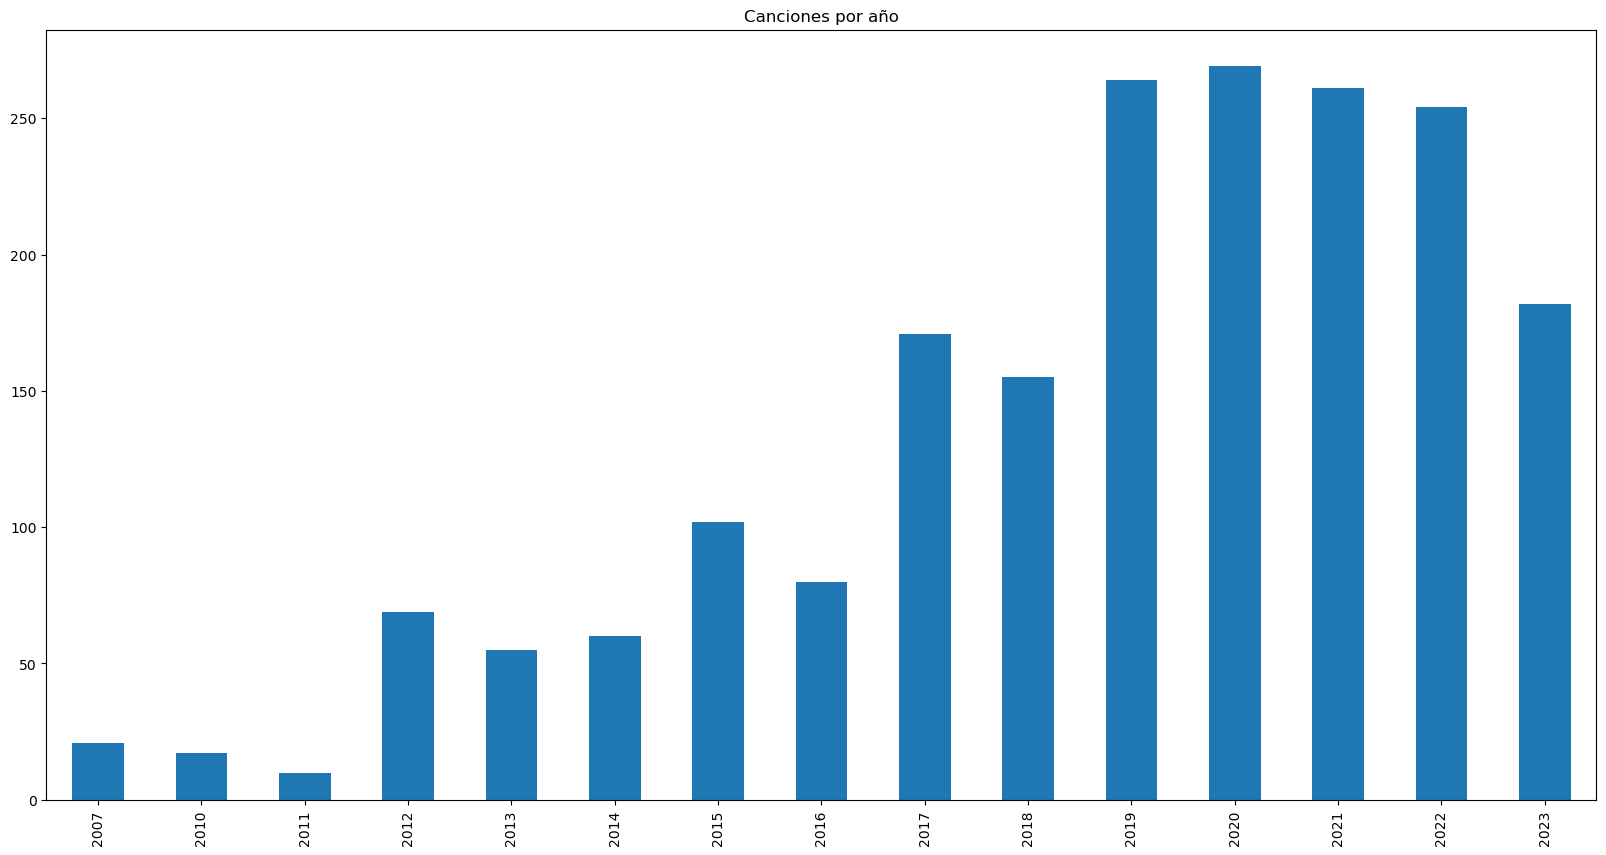

In [171]:
# Vamos a explorar los datos por año para ver la cantidad de canciones que existen por año
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))
plt.title('Canciones por año')
plt.savefig('canciones_por_año.png')

### Conclusión 

Encontramos un gran desbalanceo de datos entre los años 2007-2011, así que vamos a limitar el tiempo de análisis desde 2012.

In [172]:
df = df[df['year'] >= '2012']

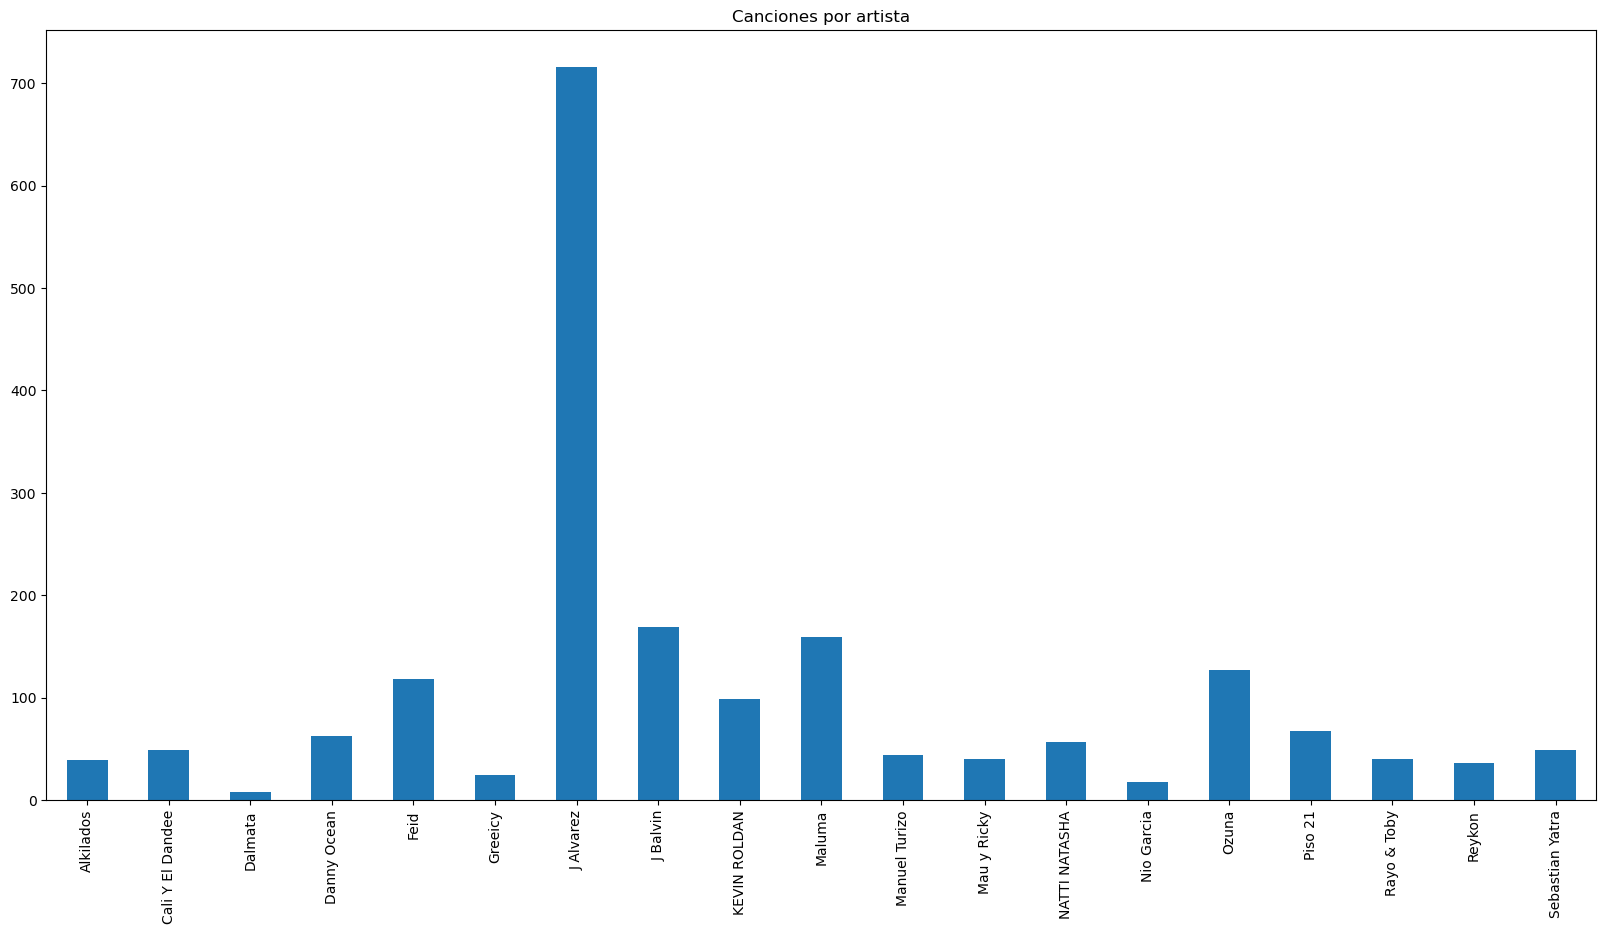

In [173]:
# Ahora vamos a ver la cantidad de canciones por artista
df['artist_name'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))
plt.title('Canciones por artista')
plt.savefig('canciones_por_artista.png')

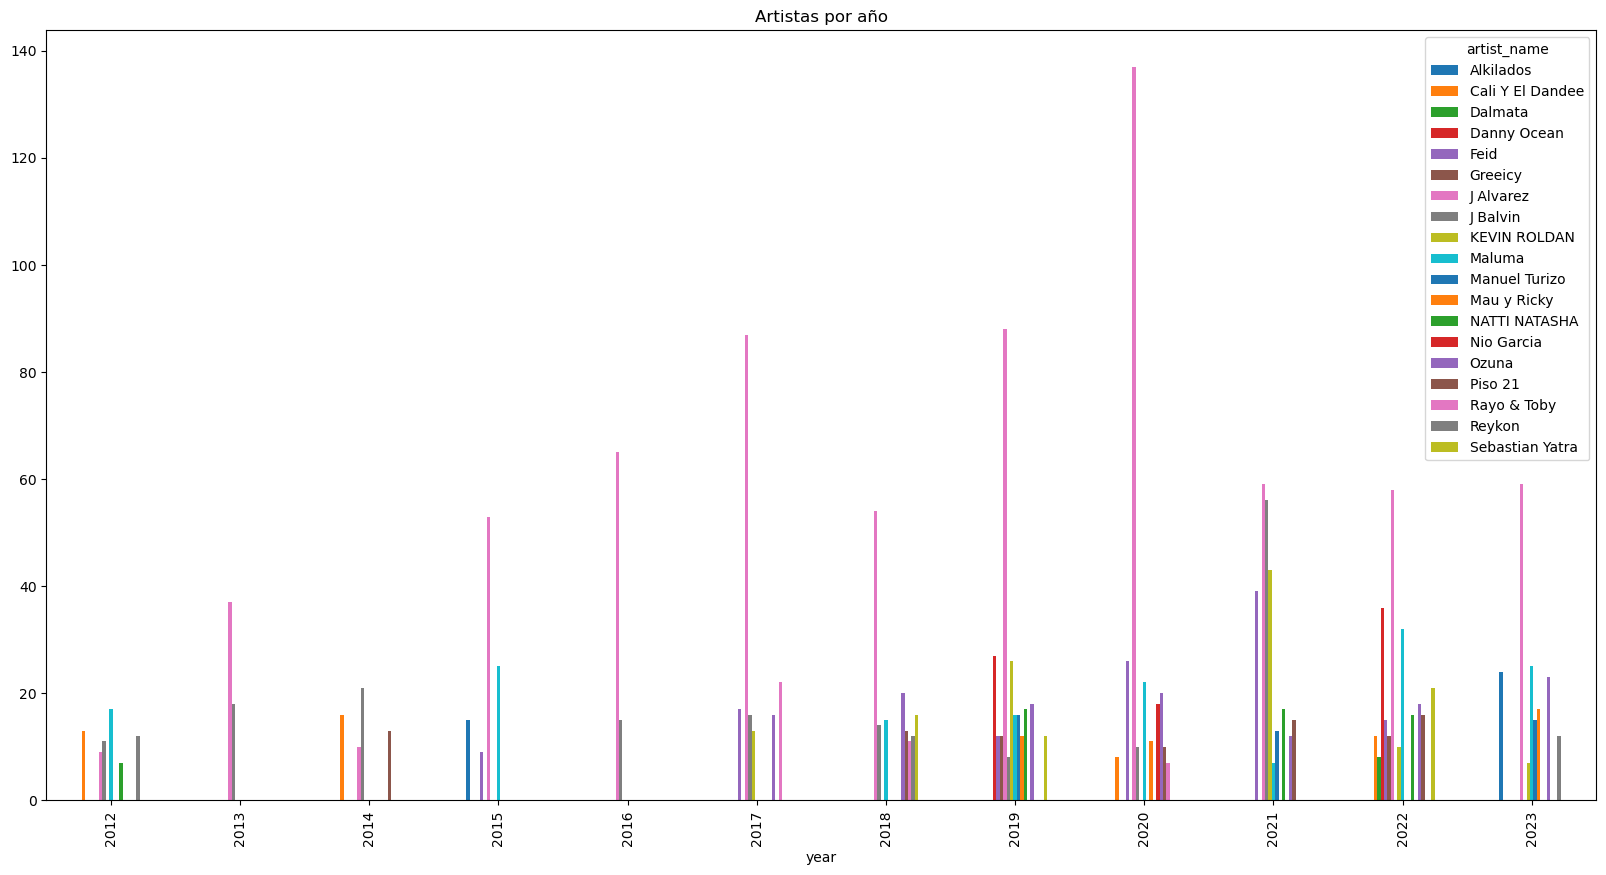

In [174]:
# Analizamos ahora los artistas por año

df.groupby(['year', 'artist_name']).size().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Artistas por año')
plt.savefig('artistas_por_año.png')

### Conclusiones

Vemos que hay un artista que tiene demasiadas canciones comparadas a los demás (J Alvarez).

Además podemos ver que hay años que no tinen mucha variedad de los canciones, esto se debe a que estos años no tienen canciones top de los artistas seleccionados, estos años pueden tener problemas para el análisis que vamos a hacer, entonces tenemos dos opciones: Eliminar estos años o agregar más artistas que tengan una distribución más equitativa para estos años.

El problema está sobretodo para 2013, 2015, 2016. 

Vamos a nivelar los datos de J Alvarez para los años de 2017, 2019, 2020.

In [175]:
# Vamos a eliminar el 50% de las canciones de J Alvarez en el año 2017

# Vemos cuantas canciones tiene J Alvarez antes de eliminar
print(df[(df['artist_name'] == 'J Alvarez') & (df['year'] == '2017')].shape)
df = df.drop(df[(df['artist_name'] == 'J Alvarez') & (df['year'] == '2017')].sample(frac=0.5).index)

# Lo mismo para el año 2019
print(df[(df['artist_name'] == 'J Alvarez') & (df['year'] == '2019')].shape)
df = df.drop(df[(df['artist_name'] == 'J Alvarez') & (df['year'] == '2019')].sample(frac=0.5).index)

# Y para el año 2020
print(df[(df['artist_name'] == 'J Alvarez') & (df['year'] == '2020')].shape)
df = df.drop(df[(df['artist_name'] == 'J Alvarez') & (df['year'] == '2020')].sample(frac=0.5).index)




(87, 16)
(88, 16)
(137, 16)


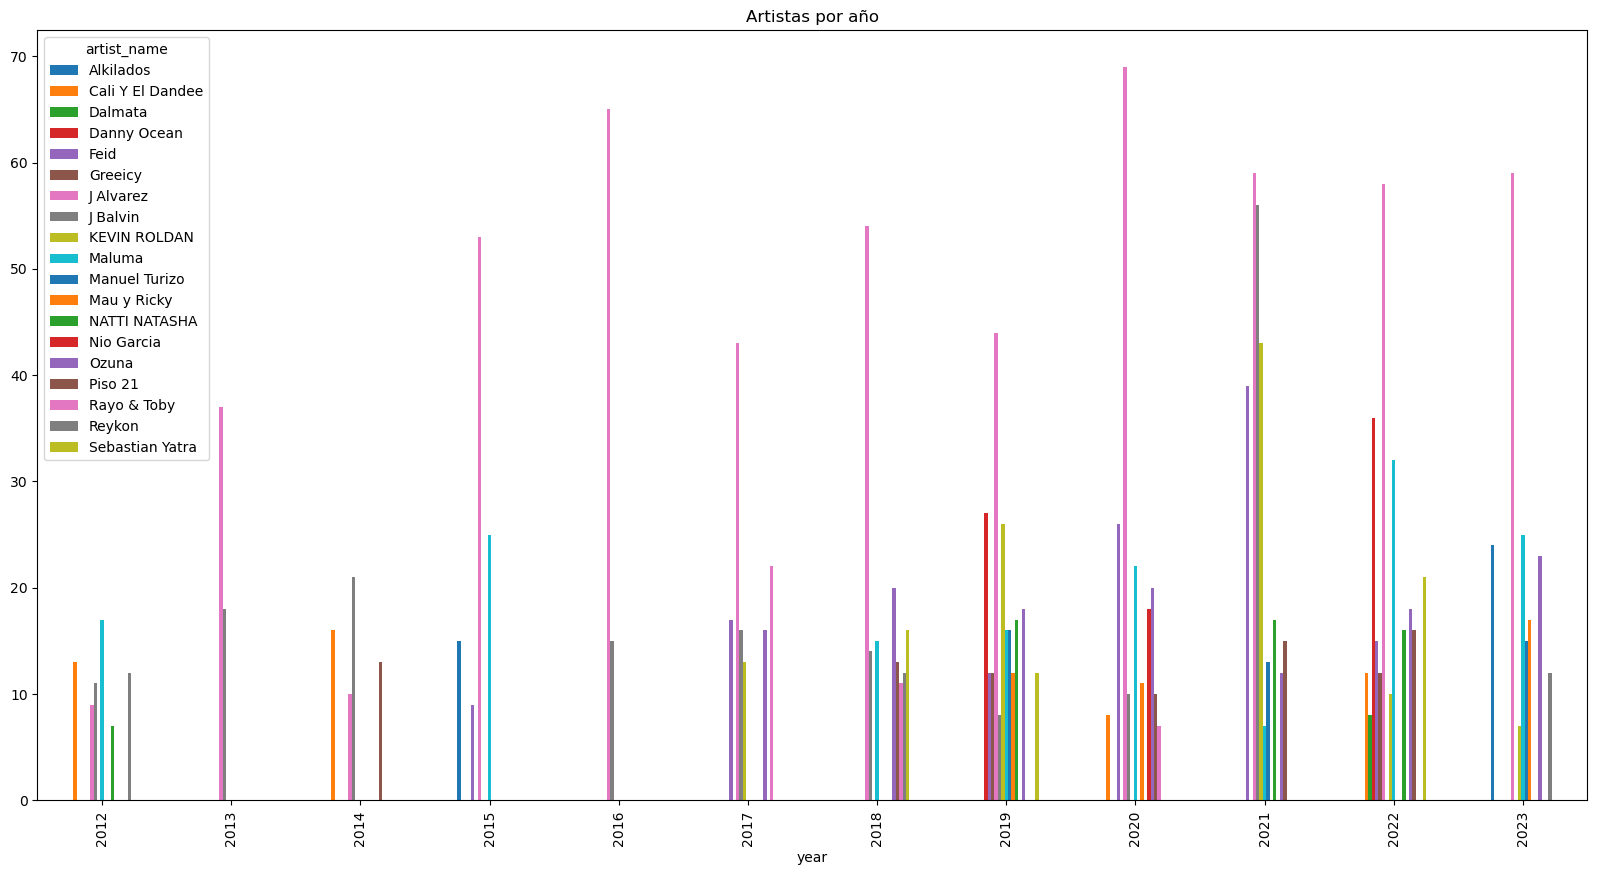

In [176]:
df.groupby(['year', 'artist_name']).size().unstack().plot(kind='bar', figsize=(20,10)) #Groupby = 1 Feid
plt.title('Artistas por año')
plt.savefig('artistas_por_año_corregido.png')

 ### Resultados del pretratamiento

Podemos observar que ahora tenemos datos más trabajables y que tienen una distribución más equitativa a lo largo de los años.

## Análisis estadístico descriptivo

In [177]:
# Vamos a realizar un análisis de las variables numéricas

df.describe()

,artist_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,73.229898,0.723084,0.707593,-5.521926,0.130605,0.228621,0.007284,0.177255,0.659053,127.160662
std,9.812886,0.102406,0.135125,1.956523,0.097456,0.194859,0.062775,0.131651,0.188036,37.996776
min,48.000000,0.086600,0.105000,-22.566000,0.027400,0.000021,0.000000,0.030700,0.063400,50.075000
25%,67.000000,0.674250,0.637000,-6.371000,0.059900,0.084350,0.000000,0.094525,0.546000,93.016000
50%,69.000000,0.737000,0.726000,-5.267000,0.094350,0.173000,0.000000,0.123000,0.689000,112.905000
75%,83.000000,0.793000,0.801000,-4.294250,0.177000,0.319750,0.000009,0.229000,0.803000,170.007750
max,89.000000,0.951000,0.989000,-1.654000,0.947000,0.978000,0.961000,0.949000,0.982000,211.974000


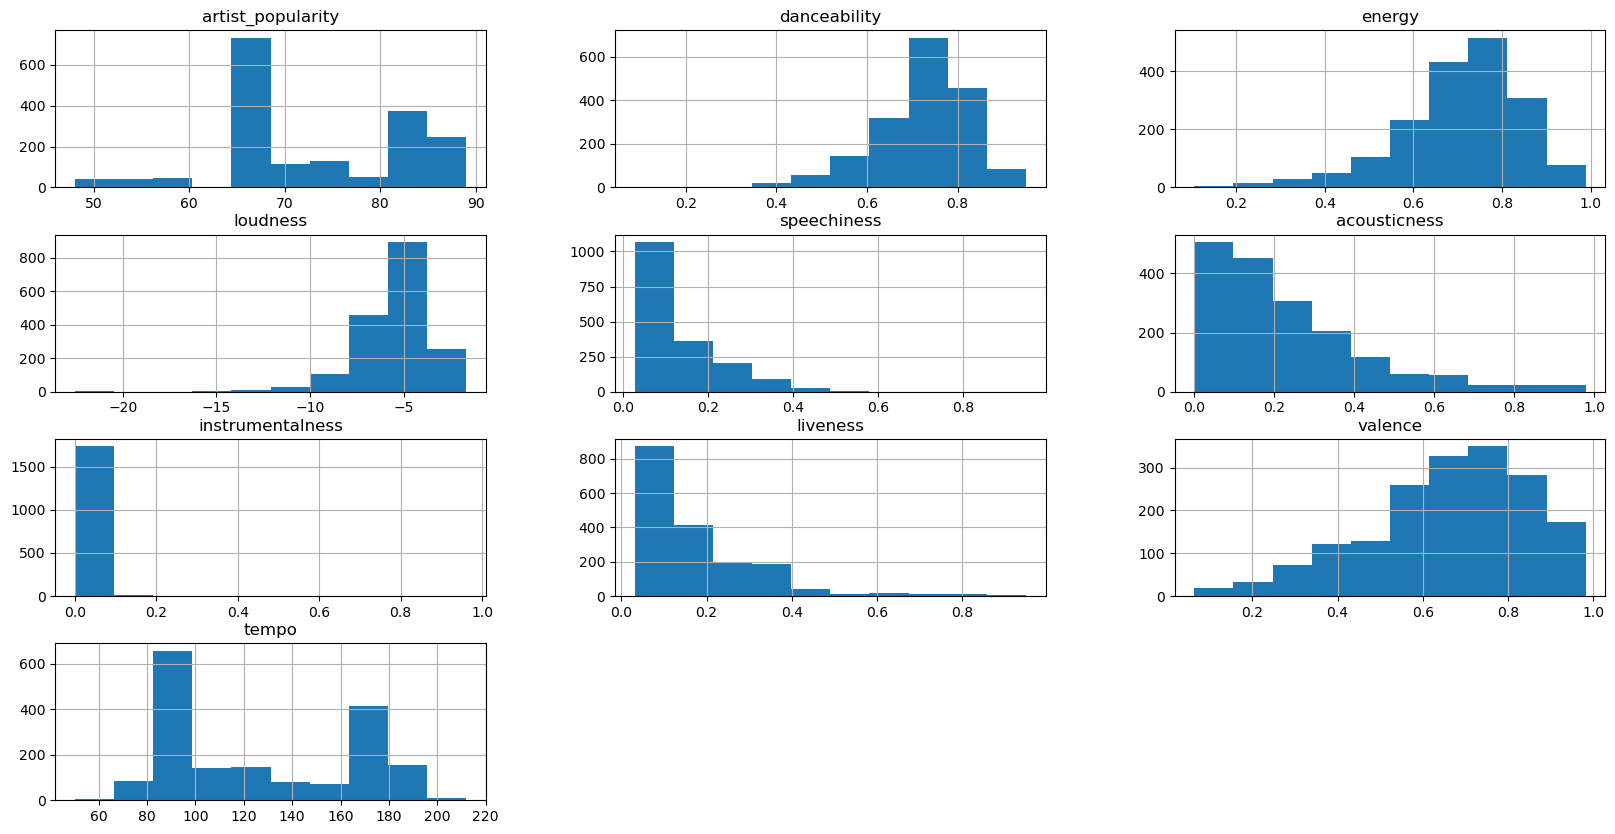

In [178]:
# Vamos a ver la distribución de las variables numéricas

df.hist(figsize=(20,10))
plt.title('Distribución de las variables')
plt.savefig('distribucion_variables.png')


Instrumentalness tiene una distribución demasiado a izquierda, sus valores no llegan a 0.01 en su mayoría, esto es conclusión de que el reguetón tiene valores muy bajos de Instrumentalness. Vamos a eliminar esta variable para tener un análisis sólo de reguetón más aceptable.

In [179]:
# Eliminamos la columna de instrumentalness ya que no nos aporta información relevante
df.drop('instrumentalness', axis=1, inplace=True)

## Conclusiones 

Tenemos variables que siguen distribuciones normales  y que se prestan para un correcto análisis de datos.



## Conceptos básicos de agrupación

/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_31360/564739647.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean().plot(kind='bar', figsize=(20,10))


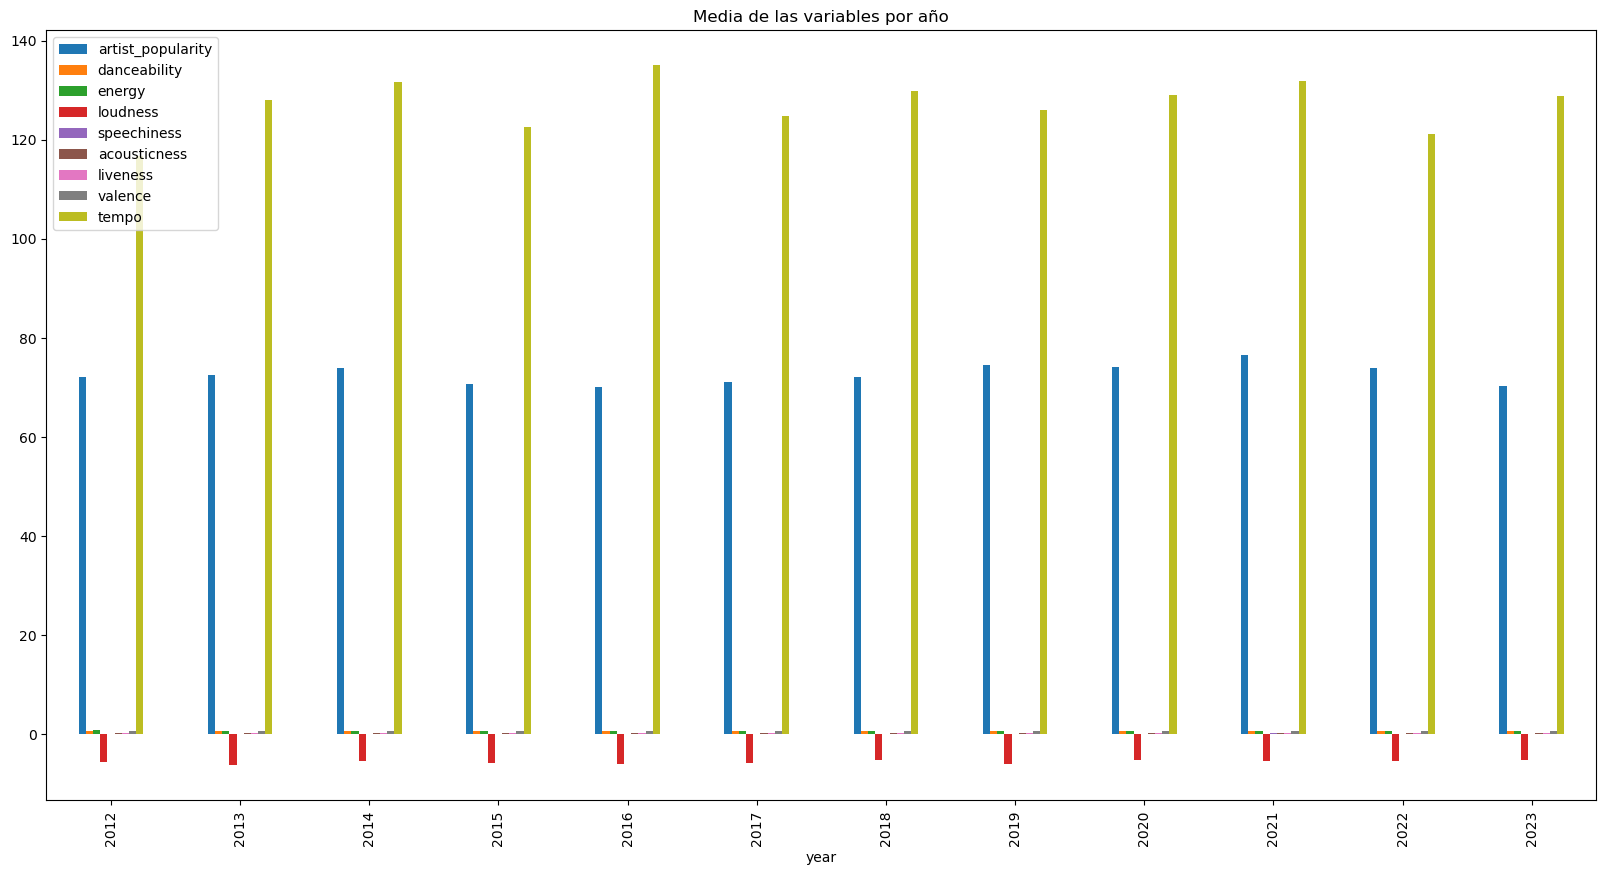

In [180]:
# Vamos a agrupar los datos por año, y vamos a calcular la media de las variables numéricas

df.groupby('year').mean().plot(kind='bar', figsize=(20,10))
plt.title('Media de las variables por año')
plt.savefig('media_variables_por_año.png')

Vamos a estandarizar las variables para que queden en valores parecidos y no negativos


/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_31360/1213990743.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean().plot(kind='bar', figsize=(20,10))


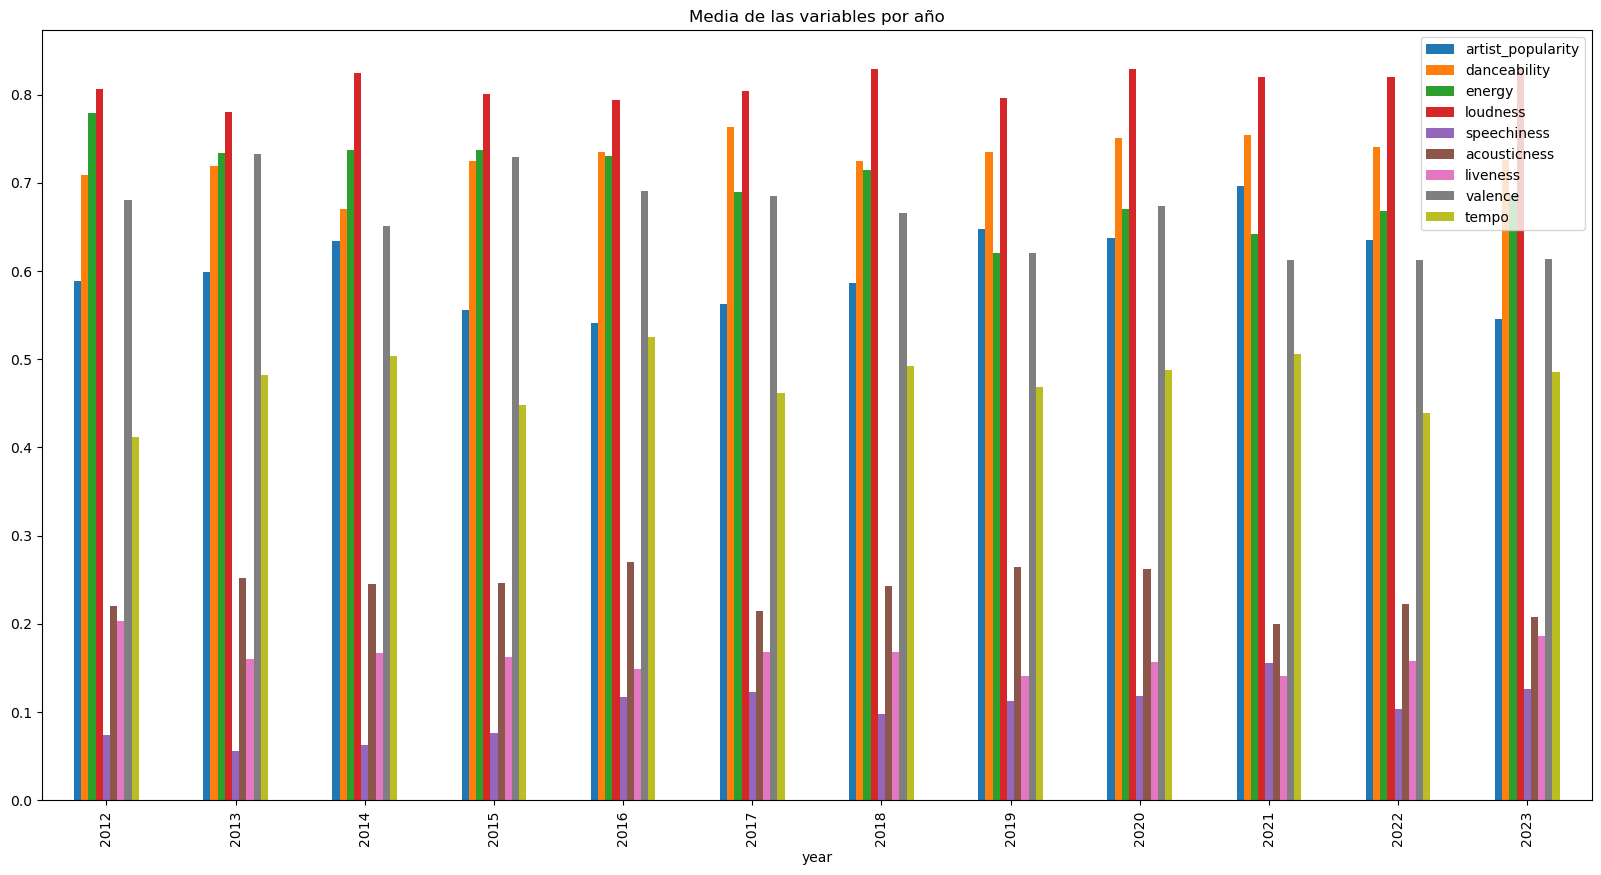

In [181]:
# Estandarización de todas las variables para que queden parecidos y no negativas

# Estandarización entre 0-1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['artist_popularity','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(df[['artist_popularity','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']])



df.groupby('year').mean().plot(kind='bar', figsize=(20,10))
plt.title('Media de las variables por año')
plt.savefig('media_variables_por_año.png')

Ya podemos ver que la estandarización nos entrega valores más analizables.

In [182]:
df_year_grouped = df.groupby('year').mean()
df_year_grouped.reset_index(inplace=True)
df_year_grouped

/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_31360/1267564841.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year_grouped = df.groupby('year').mean()


,year,artist_popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,2012,0.588547,0.708535,0.779199,0.806550,0.074483,0.219790,0.202976,0.680863,0.411428
1,2013,0.599113,0.719133,0.734060,0.780163,0.055864,0.251467,0.160542,0.732795,0.482130
2,2014,0.633740,0.669906,0.737783,0.824107,0.062598,0.245351,0.167028,0.650718,0.503928
3,2015,0.556193,0.724676,0.737279,0.800934,0.075665,0.246558,0.162399,0.729288,0.447900
4,2016,0.541159,0.734744,0.730317,0.794433,0.117064,0.270544,0.148963,0.690198,0.524886
5,2017,0.562512,0.763661,0.689092,0.803819,0.122172,0.214574,0.168274,0.684525,0.461621
6,2018,0.585995,0.725169,0.714713,0.829490,0.097466,0.243285,0.168013,0.666227,0.492628
7,2019,0.647450,0.734519,0.620958,0.796420,0.112575,0.264139,0.140891,0.620351,0.468743
8,2020,0.637059,0.751014,0.670280,0.829170,0.118732,0.262570,0.156846,0.674001,0.487935
9,2021,0.696197,0.754295,0.642248,0.820079,0.155584,0.199311,0.140615,0.612007,0.505801


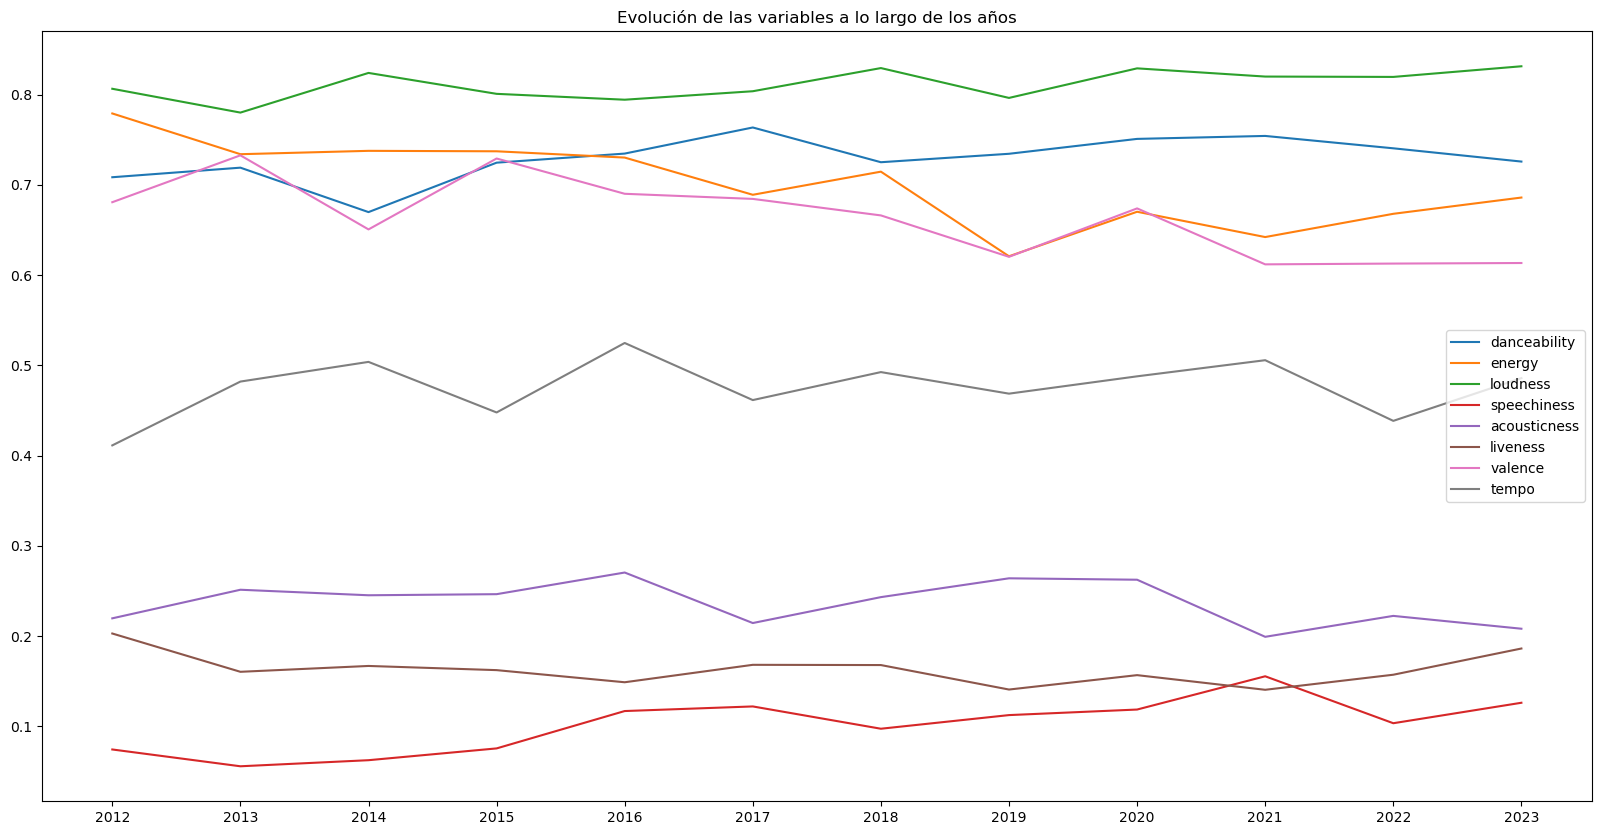

In [184]:
# Para cada variable vamos a crear un gráfico de línea para ver la evolución de la variable a lo largo de los años

plt.figure(figsize=(20,10))
plt.plot(df_year_grouped['year'], df_year_grouped['danceability'], label='danceability')
plt.plot(df_year_grouped['year'], df_year_grouped['energy'], label='energy')
plt.plot(df_year_grouped['year'], df_year_grouped['loudness'], label='loudness')
plt.plot(df_year_grouped['year'], df_year_grouped['speechiness'], label='speechiness')
plt.plot(df_year_grouped['year'], df_year_grouped['acousticness'], label='acousticness')
plt.plot(df_year_grouped['year'], df_year_grouped['liveness'], label='liveness')
plt.plot(df_year_grouped['year'], df_year_grouped['valence'], label='valence')
plt.plot(df_year_grouped['year'], df_year_grouped['tempo'], label='tempo')
plt.legend()
plt.title('Evolución de las variables a lo largo de los años')
plt.savefig('evolucion_variables_año.png')
plt.show()

Notamos un comportamiento interesante de loudness y vamos a estudiarlo especificamente.

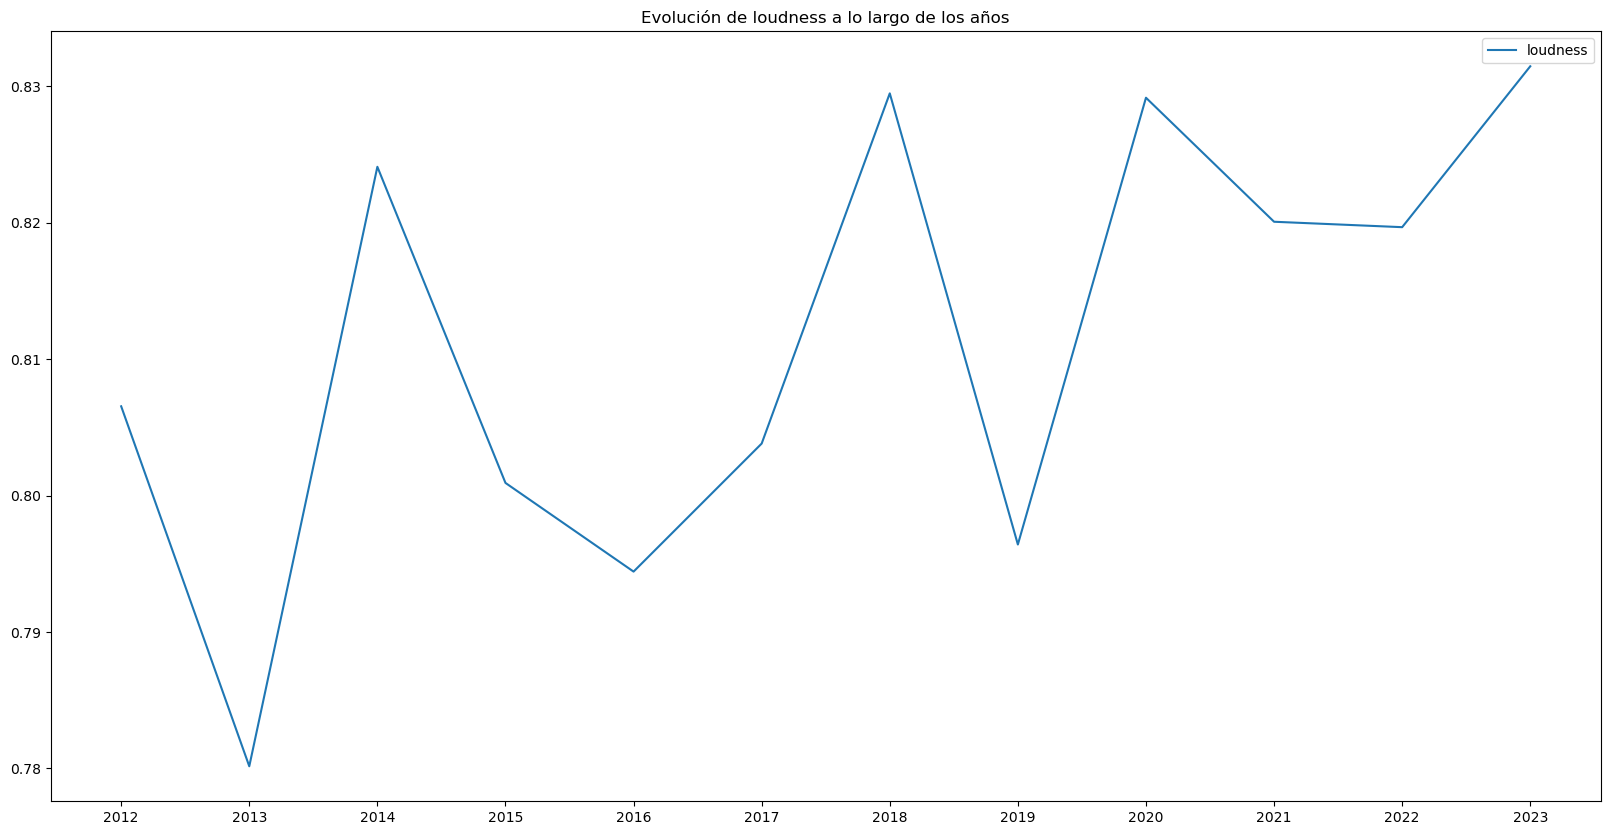

In [185]:
# Graficamos loudness a lo largo de los años

plt.figure(figsize=(20,10))
plt.plot(df_year_grouped['year'], df_year_grouped['loudness'], label='loudness')    
plt.legend()
plt.title('Evolución de loudness a lo largo de los años')
plt.savefig('evolucion_loudness_año.png')
plt.show()

Aqui podemos notar que los volumenes de las canciones de reguetón tienen una tendencia a subir.

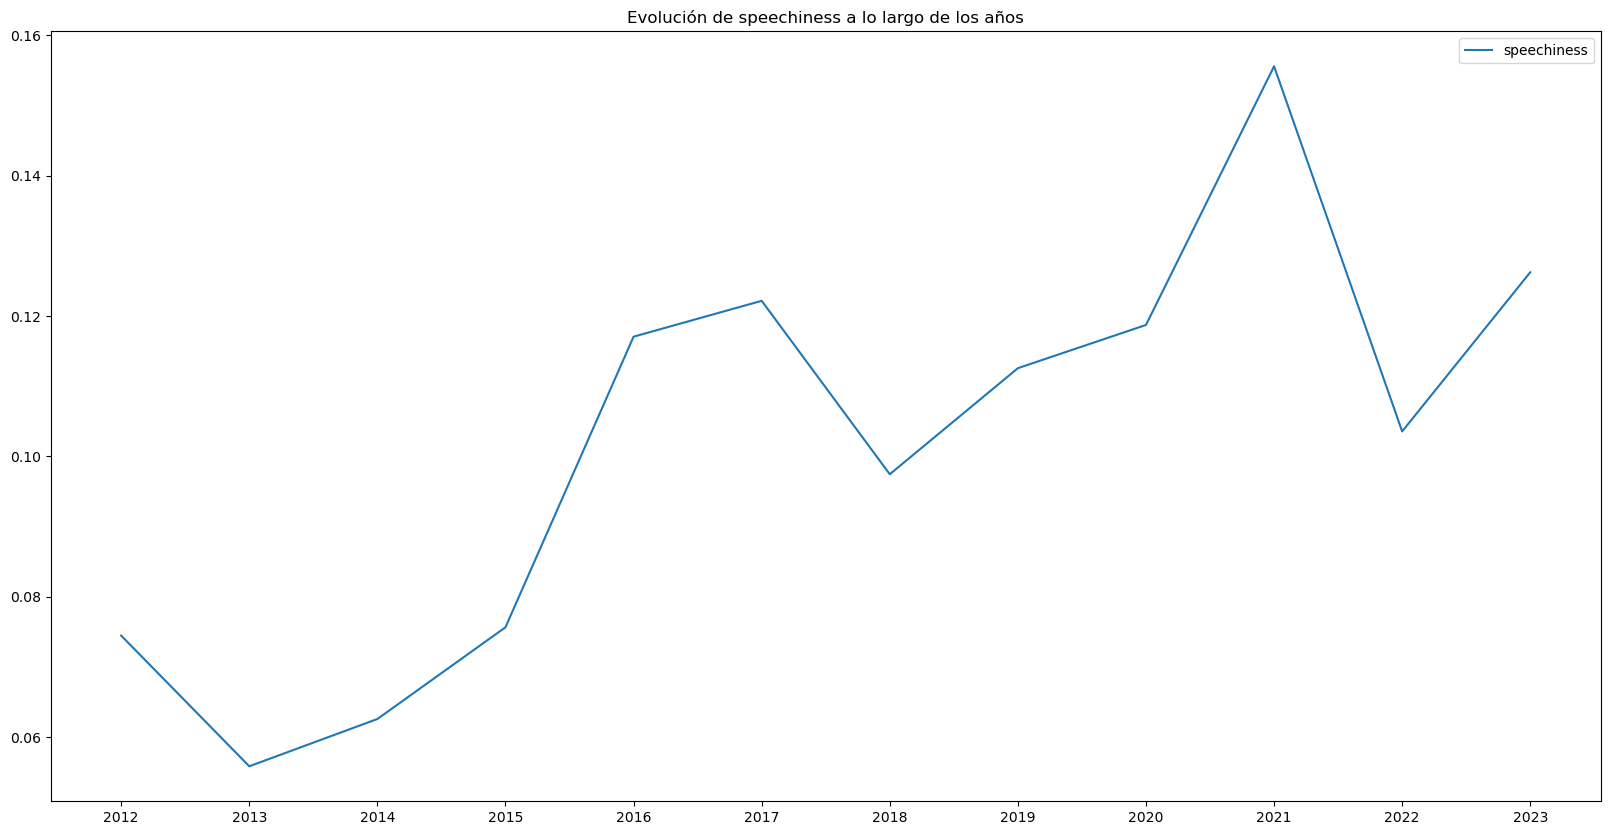

In [187]:
# Graficamos speechiness a lo largo de los años

plt.figure(figsize=(20,10))
plt.plot(df_year_grouped['year'], df_year_grouped['speechiness'], label='speechiness')    
plt.legend()
plt.title('Evolución de speechiness a lo largo de los años')
plt.savefig('evolucion_speechiness_año.png')
plt.show()

Encontramos que también el speech está subiendo en las canciones de reguetón, esto es que los artistas están hablando más en sus canciones y usan menos barras repetitivas.

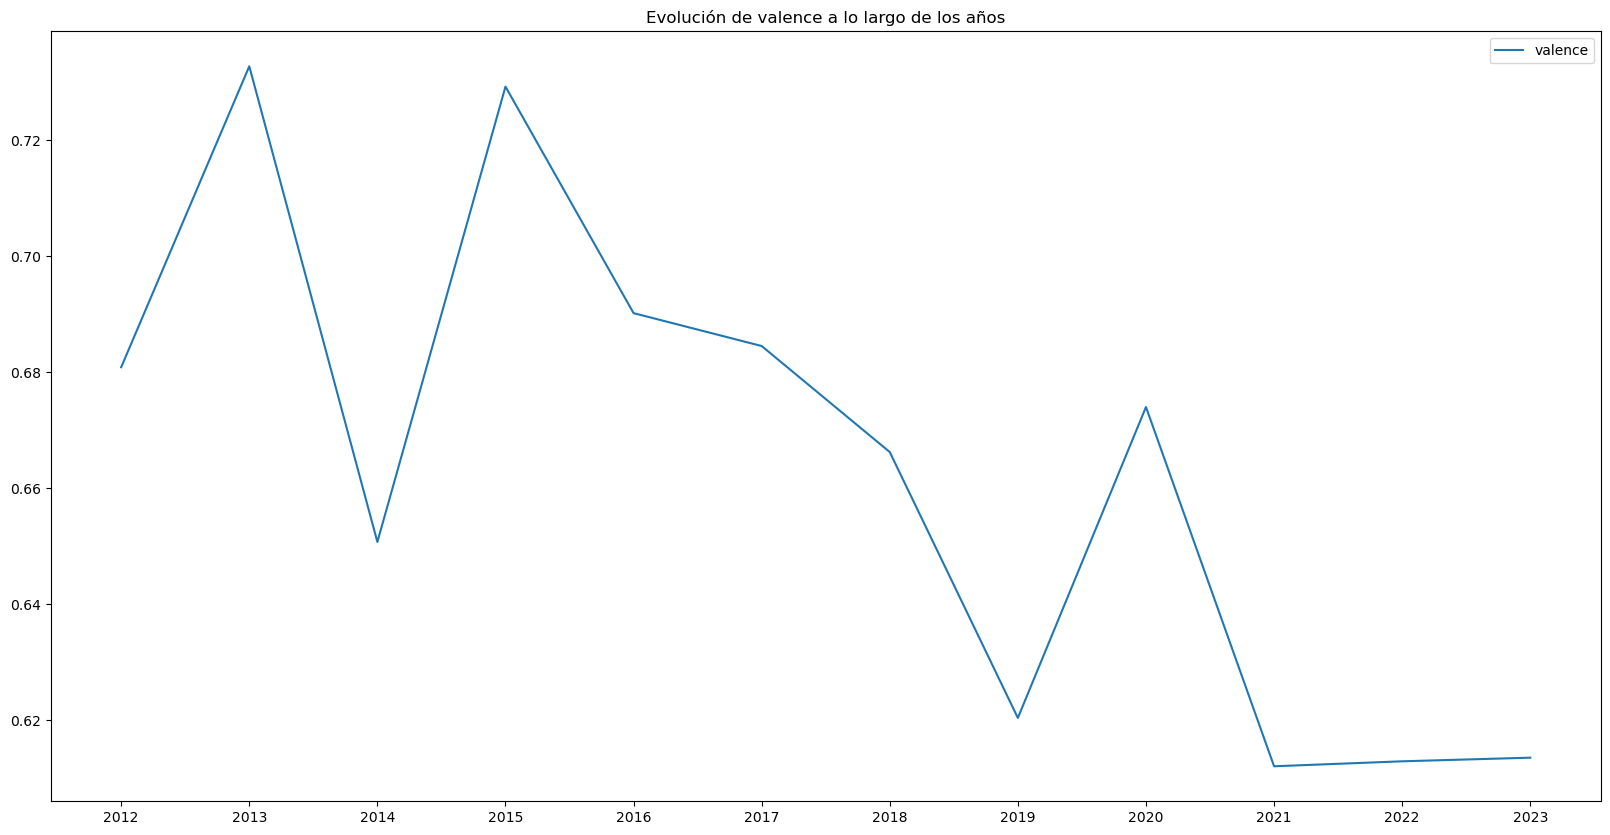

In [188]:
# Graficamos valence a lo largo de los años

plt.figure(figsize=(20,10))
plt.plot(df_year_grouped['year'], df_year_grouped['valence'], label='valence')
plt.legend()
plt.title('Evolución de valence a lo largo de los años')
plt.savefig('evolucion_valence_año.png')

## Correlación y causalidad

/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_31360/2780933064.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


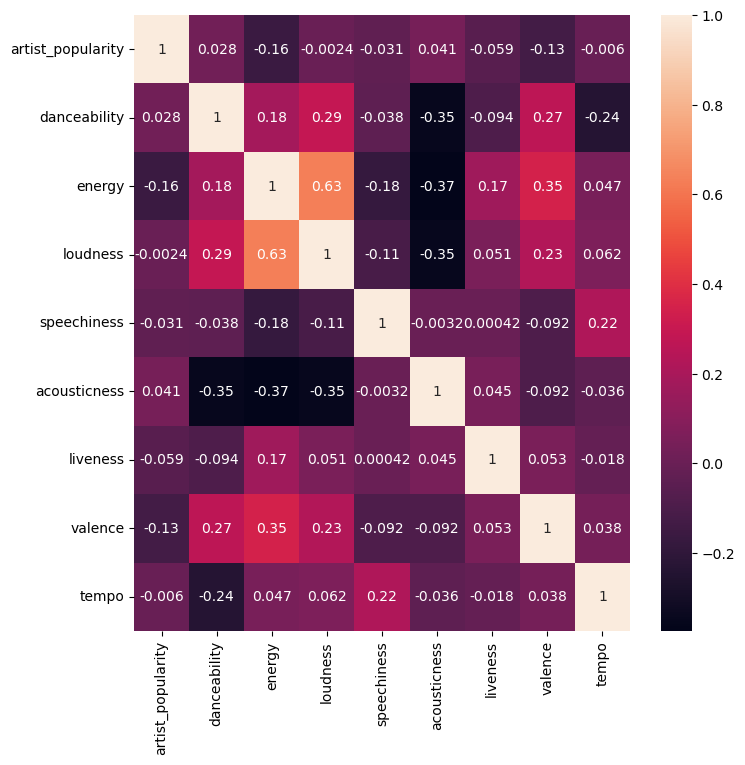

In [183]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig('correlation.png')

Aqui podemos observar poca correlación entre las variables, esto significa que las variables son informativas, y que todas son necesarias para analizar la música de reguetón. 

En energy y loudness podemos ver una correlación media (0.65) y esto lo que nos dice es que el cálculo que hace Spotify para Energy tiene en cuenta el loudness como parámetro.

##Conclusión 

existen tendencias- en el analisis del tiempo si existen variables que se mueven al mismo tiempo y en la misma direccion a pesar de que no se correlacionen